## 2. Manejo de información geo-referenciada

In [25]:
#!pip install selenium
#!pip install pandas
#!pip install html5lib
#!pip install unidecode
#!pip install webdriver_manager
#!pip install lxml
#!pip install lxmunidecodel
#!pip install xlrd
#!pip install BeautifulSoup4
#!pip install tqdm
#!pip install googlemaps
#!pip install openpyxl
#!pip install matplotlib
#!pip install seaborn
#!pip install chardet
#!pip install folium
#!pip install fiona
#!pip install contextily

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 75%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 75%; }a
</style>
"""))

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import fiona


In [3]:
# objects from Geopandas 

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

# Import libraries for Folium to create heatmap

import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [4]:
# import package pandas, geopandas, plots
import os
import seaborn as sns
import contextily as cx  
#from pyproj import CRS

## a.-Subir la base de datos de las manzanas en formate GeodataFrame. 

In [8]:
# selecting distric

district = ['ANCON','ATE','BARRANCO', 'CARABAYLLO','CIENEGUILLA', 'CHORRILLOS','COMAS','EL_AGUSTINO',
           'LA_MOLINA_LIMA','LA_VICTORIA','LIMA','LINCE','LOS_OLIVOS_LIMA','PACHACAMAC','PUEBLO_LIBRE','PUENTE_PIEDRA', 'RIMAC_LIMA','SAN_BORJA','SAN_JUAN_DE_LURIGANCHO','SAN_JUAN_DE_MIRAFLORES',
            'SAN_MARTIN_DE_PORRES','SANTA_ANITA','SURCO','VILLA_EL_SALVADOR','VILLA_MARIA_DEL_TRIUNFO']



In [9]:
#maps  = gpd.read_file(r"..\Poverty_map\5_Informacion_Cartografica-Shape\Lima\LIMA.shp")

data_files = r"../../data/Trabajo_final/5_Informacion_Cartografica-Shape/"
 

i = 0

for j in district:
        i = i + 1
        globals()[f'manzana{i}']  = gpd.read_file(f'{data_files}{j}/{j}.shp')
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'][['Mz','geometry','UBIGEO']]
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'].rename(columns = {"Mz":"id_manzana"})

        
       
        
Fmapa = manzana1.copy()

for k in range(2,i+1):
    Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)


C:\Users\Home\AppData\Local\Temp\ipykernel_2668\994143520.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_2668\994143520.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_2668\994143520.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_2668\994143520.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [10]:
#Fmapa
Fmapa['bool_series'] = Fmapa.duplicated(["id_manzana"])

In [11]:
# 670 duplicates id_manzana that share same coordinates, hence I dropped repeated 
Fmapa[Fmapa['bool_series'] == 1]
Fmapa = Fmapa[Fmapa['bool_series'] == 0]
Fmapa

,id_manzana,geometry,UBIGEO,bool_series
0,150102000102100023,"POLYGON ((-77.12763 -11.81363, -77.12723 -11.8...",150102,False
1,150102000101101010,"POLYGON ((-77.15185 -11.73780, -77.15151 -11.7...",150102,False
2,150102000100600037,"POLYGON ((-77.16978 -11.77796, -77.16981 -11.7...",150102,False
3,150102000101202048,"POLYGON ((-77.15222 -11.74137, -77.15140 -11.7...",150102,False
4,150102000101202010A,"POLYGON ((-77.16253 -11.73364, -77.16255 -11.7...",150102,False
...,...,...,...,...
77763,150143000103400036D,"POLYGON ((-76.93692 -12.16901, -76.93692 -12.1...",150143,False
77764,150143000104600043L,"POLYGON ((-76.91812 -12.16638, -76.91813 -12.1...",150143,False
77765,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,False
77766,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,False


In [12]:
# from Data.Frame to Geo.DataFrame 

MAP = gpd.GeoDataFrame(Fmapa, geometry='geometry')
MAP

,id_manzana,geometry,UBIGEO,bool_series
0,150102000102100023,"POLYGON ((-77.12763 -11.81363, -77.12723 -11.8...",150102,False
1,150102000101101010,"POLYGON ((-77.15185 -11.73780, -77.15151 -11.7...",150102,False
2,150102000100600037,"POLYGON ((-77.16978 -11.77796, -77.16981 -11.7...",150102,False
3,150102000101202048,"POLYGON ((-77.15222 -11.74137, -77.15140 -11.7...",150102,False
4,150102000101202010A,"POLYGON ((-77.16253 -11.73364, -77.16255 -11.7...",150102,False
...,...,...,...,...
77763,150143000103400036D,"POLYGON ((-76.93692 -12.16901, -76.93692 -12.1...",150143,False
77764,150143000104600043L,"POLYGON ((-76.91812 -12.16638, -76.91813 -12.1...",150143,False
77765,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,False
77766,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,False


## a.1-Crear los centroides de las manzanas.


In [13]:
MAP['centroid'] = MAP['geometry'].centroid
#Extract lat and lon from the centerpoint
MAP["lat"] = MAP.centroid.map(lambda p: p.x)
MAP["long"] = MAP.centroid.map(lambda p: p.y)

C:\Users\Home\AppData\Local\Temp\ipykernel_2668\3844988510.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  MAP['centroid'] = MAP['geometry'].centroid
C:\Users\Home\AppData\Local\Temp\ipykernel_2668\3844988510.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  MAP["lat"] = MAP.centroid.map(lambda p: p.x)
C:\Users\Home\AppData\Local\Temp\ipykernel_2668\3844988510.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  MAP["long"] = MAP.centroid.map(lambda p: p.y)


In [5]:
Salud_mental = pd.read_excel(r'../../data/Trabajo_final/Salud_mental_peru.xls')
Salud_mental

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496


In [6]:
# lat and long coordinates to point geopandas 

Salud_mental = gpd.GeoDataFrame(Salud_mental, geometry=gpd.points_from_xy(Salud_mental.long_original,Salud_mental.lat_original), crs='EPSG:4326')


In [7]:
Salud_mental

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,geometry
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095,POINT (-77.00095 -12.01728)
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385,POINT (-76.99939 -12.10766)
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597,POINT (-77.00560 -12.06221)
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523,POINT (-77.03552 -12.06635)
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147,POINT (-76.82315 -12.33377)
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497,POINT (-77.02954 -12.02942)
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523,POINT (-77.04565 -11.93451)
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885,POINT (-76.96449 -12.18609)
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496,POINT (-77.01337 -12.07142)


In [14]:
Projected_saludmental = Salud_mental.to_crs( epsg = 24891 )
Projected_saludmental[ 'centroids'] =Projected_saludmental.centroid

In [15]:
Projected_saludmental

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,geometry,centroids
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095,POINT (603437.655 759367.644),POINT (603437.655 759367.644)
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472,POINT (609014.162 746066.839),POINT (609014.162 746066.839)
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385,POINT (603480.361 749351.628),POINT (603480.361 749351.628)
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597,POINT (602867.435 754396.067),POINT (602867.435 754396.067)
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523,POINT (599598.335 753979.173),POINT (599598.335 753979.173)
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147,POINT (622356.437 724043.002),POINT (622356.437 724043.002)
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497,POINT (600301.980 758062.844),POINT (600301.980 758062.844)
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523,POINT (598677.088 768599.535),POINT (598677.088 768599.535)
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885,POINT (607172.235 740613.321),POINT (607172.235 740613.321)
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496,POINT (602006.288 753387.124),POINT (602006.288 753387.124)


In [16]:
#Proyectamos la distancia en metros 
projected_dist = MAP.to_crs( epsg = 24891 ) # proyectar de un sistema a otro

projected_dist[ 'centroids'] = projected_dist.centroid

In [17]:
for i in range (0,38): 
    projected_dist[f'distance{i}'] = projected_dist['centroids'].distance(Projected_saludmental['centroids'][i])

In [18]:
projected_dist

,id_manzana,geometry,UBIGEO,bool_series,centroid,lat,long,centroids,distance0,distance1,...,distance28,distance29,distance30,distance31,distance32,distance33,distance34,distance35,distance36,distance37
0,150102000102100023,"POLYGON ((589896.281 782101.085, 589940.480 78...",150102,False,POINT (-77.12731 -11.81361),-77.127306,-11.813613,POINT (589931.781 782102.594),26444.027443,40776.376983,...,38885.822588,43725.367160,52257.376091,32898.482041,15988.712481,14041.267057,44675.608361,24125.061172,39864.032597,29905.005162
1,150102000101101010,"POLYGON ((587353.398 790533.384, 587390.893 79...",150102,False,POINT (-77.15155 -11.73775),-77.151553,-11.737749,POINT (587385.979 790538.461),35061.034549,49452.032234,...,47696.872066,52410.923755,61014.805841,41374.764788,23075.790472,22847.441245,52986.583070,32790.653072,48600.024013,38595.794221
2,150102000100600037,"POLYGON ((585343.288 786107.754, 585339.197 78...",150102,False,POINT (-77.17017 -11.77810),-77.170172,-11.778100,POINT (585300.484 786092.629),32298.325212,46523.138610,...,44202.372506,49452.402091,57831.168323,38844.114382,21995.850699,19367.235077,50685.110917,29934.755211,45510.401720,35657.989788
3,150102000101202048,"POLYGON ((587308.599 790138.718, 587398.943 79...",150102,False,POINT (-77.15177 -11.74122),-77.151765,-11.741225,POINT (587358.251 790153.758),34732.291882,49118.580966,...,47338.253814,52076.481200,60670.778815,41059.454780,22831.125640,22483.854802,52686.003582,32456.720412,48258.910011,38259.793602
4,150102000101202010A,"POLYGON ((586192.963 791008.260, 586190.501 79...",150102,False,POINT (-77.16188 -11.73326),-77.161875,-11.733255,POINT (586265.081 791049.675),36036.764389,50408.096952,...,48528.401460,53362.779251,61924.284430,42394.671562,24241.619298,23653.829459,54047.026913,33747.076247,49523.965892,39542.882029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (-76.93702 -12.16916),-76.937023,-12.169155,POINT (610190.729 742450.098),18215.580055,3803.303901,...,8927.243414,849.965860,8241.409408,12678.588094,32684.989446,30995.672153,8500.461361,20432.757169,4883.780480,14626.986716
77764,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (-76.91812 -12.16663),-76.918123,-12.166625,POINT (612254.684 742703.332),18853.097288,4670.562974,...,10863.046148,2260.721941,8569.843241,12851.327793,32891.266785,31957.111710,6665.154493,21160.968645,6341.783394,15428.958312
77765,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (-76.91409 -12.20713),-76.914094,-12.207126,POINT (612634.601 738209.776),23070.309375,8651.069708,...,12932.251943,5691.542961,4329.039617,17292.982554,37344.573460,35884.474245,9925.220699,25310.850757,9711.137312,19512.275714
77766,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (-76.90899 -12.22471),-76.908986,-12.224713,POINT (613165.449 736253.617),25077.643472,10655.162970,...,14480.106580,7687.978352,3025.043945,19319.015285,39370.478944,37824.824462,11467.656458,27305.705086,11621.122017,21500.435331


In [19]:
for i in range (0,38): 
    projected_dist[f'distancekm{i}'] = projected_dist[f'distance{i}']/1000

In [20]:
projected_dist

,id_manzana,geometry,UBIGEO,bool_series,centroid,lat,long,centroids,distance0,distance1,...,distancekm28,distancekm29,distancekm30,distancekm31,distancekm32,distancekm33,distancekm34,distancekm35,distancekm36,distancekm37
0,150102000102100023,"POLYGON ((589896.281 782101.085, 589940.480 78...",150102,False,POINT (-77.12731 -11.81361),-77.127306,-11.813613,POINT (589931.781 782102.594),26444.027443,40776.376983,...,38.885823,43.725367,52.257376,32.898482,15.988712,14.041267,44.675608,24.125061,39.864033,29.905005
1,150102000101101010,"POLYGON ((587353.398 790533.384, 587390.893 79...",150102,False,POINT (-77.15155 -11.73775),-77.151553,-11.737749,POINT (587385.979 790538.461),35061.034549,49452.032234,...,47.696872,52.410924,61.014806,41.374765,23.075790,22.847441,52.986583,32.790653,48.600024,38.595794
2,150102000100600037,"POLYGON ((585343.288 786107.754, 585339.197 78...",150102,False,POINT (-77.17017 -11.77810),-77.170172,-11.778100,POINT (585300.484 786092.629),32298.325212,46523.138610,...,44.202373,49.452402,57.831168,38.844114,21.995851,19.367235,50.685111,29.934755,45.510402,35.657990
3,150102000101202048,"POLYGON ((587308.599 790138.718, 587398.943 79...",150102,False,POINT (-77.15177 -11.74122),-77.151765,-11.741225,POINT (587358.251 790153.758),34732.291882,49118.580966,...,47.338254,52.076481,60.670779,41.059455,22.831126,22.483855,52.686004,32.456720,48.258910,38.259794
4,150102000101202010A,"POLYGON ((586192.963 791008.260, 586190.501 79...",150102,False,POINT (-77.16188 -11.73326),-77.161875,-11.733255,POINT (586265.081 791049.675),36036.764389,50408.096952,...,48.528401,53.362779,61.924284,42.394672,24.241619,23.653829,54.047027,33.747076,49.523966,39.542882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (-76.93702 -12.16916),-76.937023,-12.169155,POINT (610190.729 742450.098),18215.580055,3803.303901,...,8.927243,0.849966,8.241409,12.678588,32.684989,30.995672,8.500461,20.432757,4.883780,14.626987
77764,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (-76.91812 -12.16663),-76.918123,-12.166625,POINT (612254.684 742703.332),18853.097288,4670.562974,...,10.863046,2.260722,8.569843,12.851328,32.891267,31.957112,6.665154,21.160969,6.341783,15.428958
77765,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (-76.91409 -12.20713),-76.914094,-12.207126,POINT (612634.601 738209.776),23070.309375,8651.069708,...,12.932252,5.691543,4.329040,17.292983,37.344573,35.884474,9.925221,25.310851,9.711137,19.512276
77766,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (-76.90899 -12.22471),-76.908986,-12.224713,POINT (613165.449 736253.617),25077.643472,10655.162970,...,14.480107,7.687978,3.025044,19.319015,39.370479,37.824824,11.467656,27.305705,11.621122,21.500435


In [21]:
projected_dist.iloc[:,46:84]

,distancekm0,distancekm1,distancekm2,distancekm3,distancekm4,distancekm5,distancekm6,distancekm7,distancekm8,distancekm9,...,distancekm28,distancekm29,distancekm30,distancekm31,distancekm32,distancekm33,distancekm34,distancekm35,distancekm36,distancekm37
0,26.444027,40.776377,35.442768,30.577488,29.738343,66.500184,26.181111,16.087666,44.928755,31.150794,...,38.885823,43.725367,52.257376,32.898482,15.988712,14.041267,44.675608,24.125061,39.864033,29.905005
1,35.061035,49.452032,44.219728,39.318547,38.545079,75.130413,34.949803,24.673986,53.703031,39.924620,...,47.696872,52.410924,61.014806,41.374765,23.075790,22.847441,52.986583,32.790653,48.600024,38.595794
2,32.298325,46.523139,40.992793,36.239065,35.152561,72.272400,31.791724,22.021396,50.465245,36.725114,...,44.202373,49.452402,57.831168,38.844114,21.995851,19.367235,50.685111,29.934755,45.510402,35.657990
3,34.732292,49.118581,43.871817,38.976241,38.189269,74.803109,34.602990,24.345443,53.355871,39.577145,...,47.338254,52.076481,60.670779,41.059455,22.831126,22.483855,52.686004,32.456720,48.258910,38.259794
4,36.036764,50.408097,45.112005,40.238354,39.395402,76.108344,35.849205,25.652810,54.597939,40.819767,...,48.528401,53.362779,61.924284,42.394672,24.241619,23.653829,54.047027,33.747076,49.523966,39.542882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,18.215580,3.803304,9.626014,14.012023,15.656257,22.064125,18.480942,28.571962,3.533420,13.660293,...,8.927243,0.849966,8.241409,12.678588,32.684989,30.995672,8.500461,20.432757,4.883780,14.626987
77764,18.853097,4.670563,11.008569,14.994682,16.950745,21.219173,19.462316,29.239775,5.495402,14.804493,...,10.863046,2.260722,8.569843,12.851328,32.891267,31.957112,6.665154,21.160969,6.341783,15.428958
77765,23.070309,8.651070,14.420158,18.904854,20.460159,17.181722,23.371732,33.441735,5.967786,18.528705,...,12.932252,5.691543,4.329040,17.292983,37.344573,35.884474,9.925221,25.310851,9.711137,19.512276
77766,25.077643,10.655163,16.289838,20.861389,22.321782,15.283107,25.320174,35.442503,7.411183,20.447101,...,14.480107,7.687978,3.025044,19.319015,39.370479,37.824824,11.467656,27.305705,11.621122,21.500435


In [22]:
projected_dist['distanciakm_min'] = projected_dist.iloc[:,46:84].min(axis=1)

In [23]:
projected_dist

,id_manzana,geometry,UBIGEO,bool_series,centroid,lat,long,centroids,distance0,distance1,...,distancekm29,distancekm30,distancekm31,distancekm32,distancekm33,distancekm34,distancekm35,distancekm36,distancekm37,distanciakm_min
0,150102000102100023,"POLYGON ((589896.281 782101.085, 589940.480 78...",150102,False,POINT (-77.12731 -11.81361),-77.127306,-11.813613,POINT (589931.781 782102.594),26444.027443,40776.376983,...,43.725367,52.257376,32.898482,15.988712,14.041267,44.675608,24.125061,39.864033,29.905005,8.292996
1,150102000101101010,"POLYGON ((587353.398 790533.384, 587390.893 79...",150102,False,POINT (-77.15155 -11.73775),-77.151553,-11.737749,POINT (587385.979 790538.461),35061.034549,49452.032234,...,52.410924,61.014806,41.374765,23.075790,22.847441,52.986583,32.790653,48.600024,38.595794,4.189954
2,150102000100600037,"POLYGON ((585343.288 786107.754, 585339.197 78...",150102,False,POINT (-77.17017 -11.77810),-77.170172,-11.778100,POINT (585300.484 786092.629),32298.325212,46523.138610,...,49.452402,57.831168,38.844114,21.995851,19.367235,50.685111,29.934755,45.510402,35.657990,8.985606
3,150102000101202048,"POLYGON ((587308.599 790138.718, 587398.943 79...",150102,False,POINT (-77.15177 -11.74122),-77.151765,-11.741225,POINT (587358.251 790153.758),34732.291882,49118.580966,...,52.076481,60.670779,41.059455,22.831126,22.483855,52.686004,32.456720,48.258910,38.259794,4.495051
4,150102000101202010A,"POLYGON ((586192.963 791008.260, 586190.501 79...",150102,False,POINT (-77.16188 -11.73326),-77.161875,-11.733255,POINT (586265.081 791049.675),36036.764389,50408.096952,...,53.362779,61.924284,42.394672,24.241619,23.653829,54.047027,33.747076,49.523966,39.542882,4.734901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (-76.93702 -12.16916),-76.937023,-12.169155,POINT (610190.729 742450.098),18215.580055,3803.303901,...,0.849966,8.241409,12.678588,32.684989,30.995672,8.500461,20.432757,4.883780,14.626987,0.849966
77764,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (-76.91812 -12.16663),-76.918123,-12.166625,POINT (612254.684 742703.332),18853.097288,4670.562974,...,2.260722,8.569843,12.851328,32.891267,31.957112,6.665154,21.160969,6.341783,15.428958,2.260722
77765,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (-76.91409 -12.20713),-76.914094,-12.207126,POINT (612634.601 738209.776),23070.309375,8651.069708,...,5.691543,4.329040,17.292983,37.344573,35.884474,9.925221,25.310851,9.711137,19.512276,3.145571
77766,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (-76.90899 -12.22471),-76.908986,-12.224713,POINT (613165.449 736253.617),25077.643472,10655.162970,...,7.687978,3.025044,19.319015,39.370479,37.824824,11.467656,27.305705,11.621122,21.500435,3.025044


# Creamos la variable Treatment

In [24]:
projected_dist['Treatment'] = np.where((projected_dist['distanciakm_min'] < 1),1, 0)

In [25]:
projected_dist

,id_manzana,geometry,UBIGEO,bool_series,centroid,lat,long,centroids,distance0,distance1,...,distancekm30,distancekm31,distancekm32,distancekm33,distancekm34,distancekm35,distancekm36,distancekm37,distanciakm_min,Treatment
0,150102000102100023,"POLYGON ((589896.281 782101.085, 589940.480 78...",150102,False,POINT (-77.12731 -11.81361),-77.127306,-11.813613,POINT (589931.781 782102.594),26444.027443,40776.376983,...,52.257376,32.898482,15.988712,14.041267,44.675608,24.125061,39.864033,29.905005,8.292996,0
1,150102000101101010,"POLYGON ((587353.398 790533.384, 587390.893 79...",150102,False,POINT (-77.15155 -11.73775),-77.151553,-11.737749,POINT (587385.979 790538.461),35061.034549,49452.032234,...,61.014806,41.374765,23.075790,22.847441,52.986583,32.790653,48.600024,38.595794,4.189954,0
2,150102000100600037,"POLYGON ((585343.288 786107.754, 585339.197 78...",150102,False,POINT (-77.17017 -11.77810),-77.170172,-11.778100,POINT (585300.484 786092.629),32298.325212,46523.138610,...,57.831168,38.844114,21.995851,19.367235,50.685111,29.934755,45.510402,35.657990,8.985606,0
3,150102000101202048,"POLYGON ((587308.599 790138.718, 587398.943 79...",150102,False,POINT (-77.15177 -11.74122),-77.151765,-11.741225,POINT (587358.251 790153.758),34732.291882,49118.580966,...,60.670779,41.059455,22.831126,22.483855,52.686004,32.456720,48.258910,38.259794,4.495051,0
4,150102000101202010A,"POLYGON ((586192.963 791008.260, 586190.501 79...",150102,False,POINT (-77.16188 -11.73326),-77.161875,-11.733255,POINT (586265.081 791049.675),36036.764389,50408.096952,...,61.924284,42.394672,24.241619,23.653829,54.047027,33.747076,49.523966,39.542882,4.734901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (-76.93702 -12.16916),-76.937023,-12.169155,POINT (610190.729 742450.098),18215.580055,3803.303901,...,8.241409,12.678588,32.684989,30.995672,8.500461,20.432757,4.883780,14.626987,0.849966,1
77764,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (-76.91812 -12.16663),-76.918123,-12.166625,POINT (612254.684 742703.332),18853.097288,4670.562974,...,8.569843,12.851328,32.891267,31.957112,6.665154,21.160969,6.341783,15.428958,2.260722,0
77765,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (-76.91409 -12.20713),-76.914094,-12.207126,POINT (612634.601 738209.776),23070.309375,8651.069708,...,4.329040,17.292983,37.344573,35.884474,9.925221,25.310851,9.711137,19.512276,3.145571,0
77766,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (-76.90899 -12.22471),-76.908986,-12.224713,POINT (613165.449 736253.617),25077.643472,10655.162970,...,3.025044,19.319015,39.370479,37.824824,11.467656,27.305705,11.621122,21.500435,3.025044,0


# Creamos la variable control

In [26]:
projected_dist['control'] = np.where((projected_dist['distanciakm_min']>=1) & ((projected_dist['distanciakm_min']<=2)), 1, 0)

In [27]:
projected_dist

,id_manzana,geometry,UBIGEO,bool_series,centroid,lat,long,centroids,distance0,distance1,...,distancekm31,distancekm32,distancekm33,distancekm34,distancekm35,distancekm36,distancekm37,distanciakm_min,Treatment,control
0,150102000102100023,"POLYGON ((589896.281 782101.085, 589940.480 78...",150102,False,POINT (-77.12731 -11.81361),-77.127306,-11.813613,POINT (589931.781 782102.594),26444.027443,40776.376983,...,32.898482,15.988712,14.041267,44.675608,24.125061,39.864033,29.905005,8.292996,0,0
1,150102000101101010,"POLYGON ((587353.398 790533.384, 587390.893 79...",150102,False,POINT (-77.15155 -11.73775),-77.151553,-11.737749,POINT (587385.979 790538.461),35061.034549,49452.032234,...,41.374765,23.075790,22.847441,52.986583,32.790653,48.600024,38.595794,4.189954,0,0
2,150102000100600037,"POLYGON ((585343.288 786107.754, 585339.197 78...",150102,False,POINT (-77.17017 -11.77810),-77.170172,-11.778100,POINT (585300.484 786092.629),32298.325212,46523.138610,...,38.844114,21.995851,19.367235,50.685111,29.934755,45.510402,35.657990,8.985606,0,0
3,150102000101202048,"POLYGON ((587308.599 790138.718, 587398.943 79...",150102,False,POINT (-77.15177 -11.74122),-77.151765,-11.741225,POINT (587358.251 790153.758),34732.291882,49118.580966,...,41.059455,22.831126,22.483855,52.686004,32.456720,48.258910,38.259794,4.495051,0,0
4,150102000101202010A,"POLYGON ((586192.963 791008.260, 586190.501 79...",150102,False,POINT (-77.16188 -11.73326),-77.161875,-11.733255,POINT (586265.081 791049.675),36036.764389,50408.096952,...,42.394672,24.241619,23.653829,54.047027,33.747076,49.523966,39.542882,4.734901,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (-76.93702 -12.16916),-76.937023,-12.169155,POINT (610190.729 742450.098),18215.580055,3803.303901,...,12.678588,32.684989,30.995672,8.500461,20.432757,4.883780,14.626987,0.849966,1,0
77764,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (-76.91812 -12.16663),-76.918123,-12.166625,POINT (612254.684 742703.332),18853.097288,4670.562974,...,12.851328,32.891267,31.957112,6.665154,21.160969,6.341783,15.428958,2.260722,0,0
77765,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (-76.91409 -12.20713),-76.914094,-12.207126,POINT (612634.601 738209.776),23070.309375,8651.069708,...,17.292983,37.344573,35.884474,9.925221,25.310851,9.711137,19.512276,3.145571,0,0
77766,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (-76.90899 -12.22471),-76.908986,-12.224713,POINT (613165.449 736253.617),25077.643472,10655.162970,...,19.319015,39.370479,37.824824,11.467656,27.305705,11.621122,21.500435,3.025044,0,0


# Creamos la variable neutral 

In [28]:
projected_dist['neutral'] = np.where((projected_dist['Treatment'] != 1) & ((projected_dist['control'] != 1)), 1, 0)

In [29]:
projected_dist

,id_manzana,geometry,UBIGEO,bool_series,centroid,lat,long,centroids,distance0,distance1,...,distancekm32,distancekm33,distancekm34,distancekm35,distancekm36,distancekm37,distanciakm_min,Treatment,control,neutral
0,150102000102100023,"POLYGON ((589896.281 782101.085, 589940.480 78...",150102,False,POINT (-77.12731 -11.81361),-77.127306,-11.813613,POINT (589931.781 782102.594),26444.027443,40776.376983,...,15.988712,14.041267,44.675608,24.125061,39.864033,29.905005,8.292996,0,0,1
1,150102000101101010,"POLYGON ((587353.398 790533.384, 587390.893 79...",150102,False,POINT (-77.15155 -11.73775),-77.151553,-11.737749,POINT (587385.979 790538.461),35061.034549,49452.032234,...,23.075790,22.847441,52.986583,32.790653,48.600024,38.595794,4.189954,0,0,1
2,150102000100600037,"POLYGON ((585343.288 786107.754, 585339.197 78...",150102,False,POINT (-77.17017 -11.77810),-77.170172,-11.778100,POINT (585300.484 786092.629),32298.325212,46523.138610,...,21.995851,19.367235,50.685111,29.934755,45.510402,35.657990,8.985606,0,0,1
3,150102000101202048,"POLYGON ((587308.599 790138.718, 587398.943 79...",150102,False,POINT (-77.15177 -11.74122),-77.151765,-11.741225,POINT (587358.251 790153.758),34732.291882,49118.580966,...,22.831126,22.483855,52.686004,32.456720,48.258910,38.259794,4.495051,0,0,1
4,150102000101202010A,"POLYGON ((586192.963 791008.260, 586190.501 79...",150102,False,POINT (-77.16188 -11.73326),-77.161875,-11.733255,POINT (586265.081 791049.675),36036.764389,50408.096952,...,24.241619,23.653829,54.047027,33.747076,49.523966,39.542882,4.734901,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77763,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (-76.93702 -12.16916),-76.937023,-12.169155,POINT (610190.729 742450.098),18215.580055,3803.303901,...,32.684989,30.995672,8.500461,20.432757,4.883780,14.626987,0.849966,1,0,0
77764,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (-76.91812 -12.16663),-76.918123,-12.166625,POINT (612254.684 742703.332),18853.097288,4670.562974,...,32.891267,31.957112,6.665154,21.160969,6.341783,15.428958,2.260722,0,0,1
77765,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (-76.91409 -12.20713),-76.914094,-12.207126,POINT (612634.601 738209.776),23070.309375,8651.069708,...,37.344573,35.884474,9.925221,25.310851,9.711137,19.512276,3.145571,0,0,1
77766,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (-76.90899 -12.22471),-76.908986,-12.224713,POINT (613165.449 736253.617),25077.643472,10655.162970,...,39.370479,37.824824,11.467656,27.305705,11.621122,21.500435,3.025044,0,0,1


# Graficamos 


In [36]:
import contextily as cx  # import street map
#from pyproj import CRS


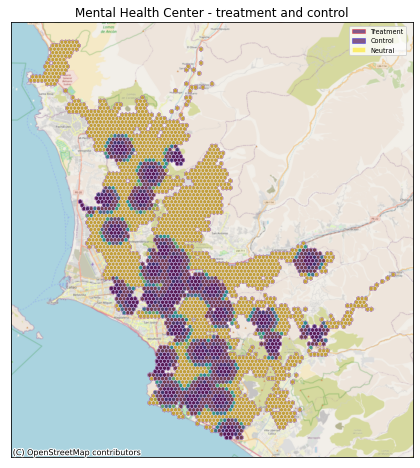

In [48]:
f, ax = plt.subplots(1, figsize = (20,8))

hb1 = ax.hexbin(projected_dist.lat, projected_dist.long, C = projected_dist['Treatment'], gridsize=100, alpha =0.65, linewidths =0.5, zorder=0.5, color='red', label = "Treatment")
hb2 = ax.hexbin(projected_dist.lat, projected_dist.long, C = projected_dist['control'], gridsize =100, alpha =0.65, linewidths=0.5, zorder=0.5, color='blue', label = "Control")
hb3 = ax.hexbin(projected_dist.lat, projected_dist.long, C = projected_dist['neutral'], gridsize =100, alpha =0.65, linewidths=0.5, zorder=0.5, color='white', label = "Neutral")

                
cx.add_basemap(ax, crs = "EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom=12)

plt.xticks([])
plt.yticks([])
plt.title('Mental Health Center - treatment and control')    
plt.legend(loc='upper right', frameon = True, bbox_to_anchor=(0.99,1), prop={'size': 6.5})


f.savefig(r'Grupo2pregunta2grafico.png', dpi=800, bbox_inches='tight')

